In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("superconductivty+data/train.csv")

X = df.drop(columns=['critical_temp'])
y = df['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [5]:
y_pred = lr.predict(X_test_scaled)

In [7]:
from sklearn.decomposition import PCA

In [8]:
# keeping enough components to explain 95% of variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count (95% variance): {X_train_pca.shape[1]}")


Original feature count: 81
Reduced feature count (95% variance): 17


In [9]:
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

y_pred_pca = lr_pca.predict(X_test_pca)

In [10]:
mse_pca = mean_squared_error(y_test, y_pred_pca)
rmse_pca = np.sqrt(mse_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"[PCA] R² Score: {r2_pca:.4f}")
print(f"[PCA] MAE: {mae_pca:.4f}")
print(f"[PCA] RMSE: {rmse_pca:.4f}")

[PCA] R² Score: 0.6119
[PCA] MAE: 16.8158
[PCA] RMSE: 21.1366


In [11]:
# lets try logistic regression on this please

In [12]:
y_test_binary = (y_test >= 75).astype(int)

y_pred_binary_from_reg = (y_pred_pca >= 75).astype(int)

In [13]:
from sklearn.linear_model import LogisticRegression

X_log_input = y_pred_pca.reshape(-1, 1)  

logreg_on_pca = LogisticRegression()
logreg_on_pca.fit(X_log_input, y_test_binary) 


LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_class_log_on_pca = logreg_on_pca.predict(X_log_input)

print("Accuracy:", accuracy_score(y_test_binary, y_pred_class_log_on_pca))
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_class_log_on_pca))


Accuracy: 0.8271808135433811

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3422
           1       0.58      0.44      0.50       831

    accuracy                           0.83      4253
   macro avg       0.72      0.68      0.70      4253
weighted avg       0.81      0.83      0.82      4253



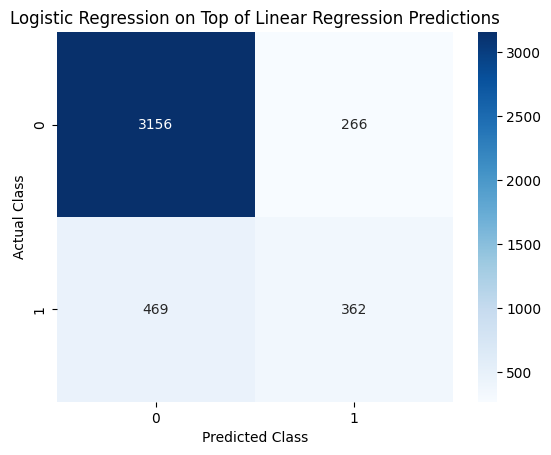

In [15]:
cm = confusion_matrix(y_test_binary, y_pred_class_log_on_pca)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression on Top of Linear Regression Predictions")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()